In [ ]:
from MMDeploy.infer import TensorrtDetector

import cv2
img = cv2.imread("MMDeploy/demo/image1641263542581163_2022012500040_THVO_TRUOC_ba_d_xoc_truoc.jpg")
img = cv2.resize(img, (320, 320))
deploy_cfg_path = "MMDeploy/configs/mmdet/instance-seg/instance-seg_tensorrt_dynamic-320x320-1344x1344_bs4.py"
model_cfg_path = "mmdetection/configs/insurance/cascade_mask_rcnn_restnext101.py"
model_file = ['MMDeploy/end2end.engine']
detector = TensorrtDetector(deploy_cfg_path, model_cfg_path, model_file)
# detector.plot(img)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-07-04 09:46:06,436 - mmdeploy - INFO - Successfully loaded tensorrt plugins from /root/workspace/mmdeploy/mmdeploy/lib/libmmdeploy_tensorrt_ops.so
2022-07-04 09:46:06,436 - mmdeploy - INFO - Successfully loaded tensorrt plugins from /root/workspace/mmdeploy/mmdeploy/lib/libmmdeploy_tensorrt_ops.so


2022-07-04 08:56:31.456 | INFO     | MMDeploy.infer:preprocess:202 - scatter


> /mnt/tensorrt_deploy/MMDeploy/infer.py(261)post_processing1()
    259                     segms_results[labels[j]].append((masks[j] > 0.5).int())
    260                 import pdb; pdb.set_trace()
--> 261                 results.append((dets_results, segms_results))
    262             else:
    263                 results.append(dets_results)



ipdb>  c


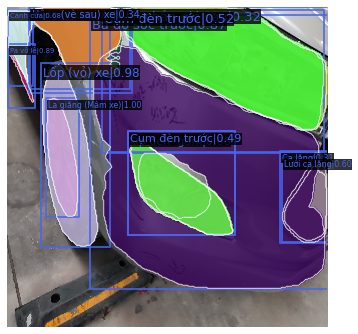

In [13]:
# detector.plot(img)

In [2]:
# detector.plot(img)
img2 = cv2.imread("MMDeploy/demo/image_picker5937101436299732752.jpeg")
img2 = cv2.resize(img2, (320, 320))


In [3]:
import argparse
import os
import warnings

import mmcv
import torch
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)

from mmdet.apis import multi_gpu_test, single_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import numpy as np

import argparse
import torch
from mmcv import DictAction
from mmcv.parallel import MMDataParallel

from mmdeploy.apis import build_task_processor
from mmdeploy.utils.config_utils import load_config
from mmdeploy.utils.device import parse_device_id
from mmdeploy.utils.timer import TimeCounter
from typing import List, Sequence, Tuple, Union
import cv2
from mmdet.core import get_classes
from mmdet.datasets import replace_ImageToTensor
from mmdet.datasets.pipelines import Compose
from mmcv.parallel import collate, scatter
from mmdet.core import bbox2result
from mmdeploy.codebase.mmdet import get_post_processing_params, multiclass_nms
import sys
import numpy as np
import cv2
import nanoid
from collections import ChainMap
import os
from loguru import logger
import threading
from config.rules_base import ruleBase, postProcessMask
from config import process_config 
import boto3
import asyncio
from botocore.exceptions import ClientError
from functools import partial
from config.rules_base import getUUID
from io import BytesIO
import time
from PIL import Image


In [4]:
#preprocessing
self = detector

imgs = np.concatenate([img[None],]*3+[img2[None],], axis = 0)
is_batch = True
cfg = self.model_cfg

device = torch.device("cuda:0")
if isinstance(imgs[0], np.ndarray):
    cfg = cfg.copy()
    # set loading pipeline type
    cfg.data.test.pipeline[0].type = 'LoadImageFromWebcam'
cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
test_pipeline = Compose(cfg.data.test.pipeline)

datas = []
for img in imgs:
    if isinstance(img, np.ndarray):
        data = dict(img=img)
    else:
        data = dict(img_info=dict(filename=img), img_prefix=None)
    data = test_pipeline(data)
    datas.append(data)
data = collate(datas, samples_per_gpu=len(imgs))
data['img_metas'] = [img_metas.data[0] for img_metas in data['img_metas']]
data['img'] = [img.data[0] for img in data['img']]
logger.info("scatter")
data = scatter(data, [device])[0]

# self = detector
# data = self.preprocess(img)
# logger.info("tart predict")
# outputs = self.predict(data)
# logger.info("tart post")
# results = self.post_processing1(data, outputs)

/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2022-07-04 09:44:27.042 | INFO     | __main__:<cell line: 27>:27 - scatter


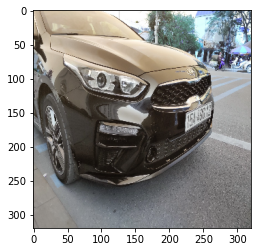

In [7]:
import matplotlib.pyplot as plt
plt.imshow(imgs[-1])
plt.show()

In [8]:
def __clear_outputs(
    test_outputs: List[Union[torch.Tensor, np.ndarray]]
) -> List[Union[List[torch.Tensor], List[np.ndarray]]]:
    batch_size = len(test_outputs[0])

    num_outputs = len(test_outputs)
    outputs = [[None for _ in range(batch_size)]
               for _ in range(num_outputs)]

    for i in range(batch_size):
        inds = test_outputs[0][i, :, 4] > 0.0
        for output_id in range(num_outputs):
            outputs[output_id][i] = test_outputs[output_id][i, inds, ...]
    return outputs

input_img = data['img'][0].contiguous()
img_metas = data['img_metas']
outputs = self.model.forward_test(input_img, img_metas, return_loss=False, rescale=True)
outputs = __clear_outputs(outputs)
# return outputs

In [9]:
len(outputs[0])

4

In [11]:
results = self.post_processing1(data, outputs)

> /mnt/tensorrt_deploy/MMDeploy/infer.py(261)post_processing1()
    259                     segms_results[labels[j]].append((masks[j] > 0.5).int())
    260                 import pdb; pdb.set_trace()
--> 261                 results.append((dets_results, segms_results))
    262             else:
    263                 results.append(dets_results)



ipdb>  c


> /mnt/tensorrt_deploy/MMDeploy/infer.py(260)post_processing1()
    258                     # segms_results[labels[j]].append(masks[j][0][0])
    259                     segms_results[labels[j]].append((masks[j] > 0.5).int())
--> 260                 import pdb; pdb.set_trace()
    261                 results.append((dets_results, segms_results))
    262             else:



ipdb>  c


> /mnt/tensorrt_deploy/MMDeploy/infer.py(261)post_processing1()
    259                     segms_results[labels[j]].append((masks[j] > 0.5).int())
    260                 import pdb; pdb.set_trace()
--> 261                 results.append((dets_results, segms_results))
    262             else:
    263                 results.append(dets_results)



ipdb>  c


> /mnt/tensorrt_deploy/MMDeploy/infer.py(260)post_processing1()
    258                     # segms_results[labels[j]].append(masks[j][0][0])
    259                     segms_results[labels[j]].append((masks[j] > 0.5).int())
--> 260                 import pdb; pdb.set_trace()
    261                 results.append((dets_results, segms_results))
    262             else:



ipdb>  c


In [46]:
len(results)

4

In [12]:
classes = []
scores = []
boxes = []
masks = []
result = results[-1]
for c in range(len(result[0])):
    if len(result[0][c])!=0:
        for i in range(len(result[0][c])):
            roi = np.array(result[0][c][i])[:4]
            score = result[0][c][i][-1]
            mask = result[1][c][i].int()[None, ...]
            # import pdb; pdb.set_trace()
            roi = np.array(roi).astype(np.int)
            classes.append(c)
            scores.append(score)
            boxes.append(roi)
            masks.append(mask)

masks = torch.cat(masks, dim = 0)
logger.info(f'FINISH SEGMENTATION! {masks.shape[0]} ANNOTATIONS WERE FOUND')
scores= torch.from_numpy(np.array(scores)).cuda()
boxes = torch.from_numpy(np.array(boxes)).cuda()

/tmp/ipykernel_932/2079722488.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  roi = np.array(roi).astype(np.int)
2022-07-04 09:45:05.987 | INFO     | __main__:<cell line: 20>:20 - FINISH SEGMENTATION! 22 ANNOTATIONS WERE FOUND


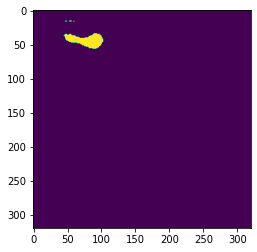

In [13]:
import matplotlib.pyplot as plt
plt.imshow(masks[2].cpu().numpy())

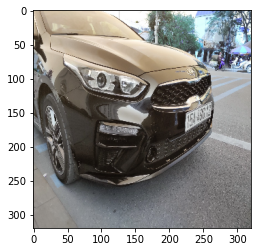

In [14]:
plt.imshow(imgs[-1])
plt.show()

In [35]:
classes = []
scores = []
boxes = []
masks = []
for c in range(len(result[0])):
    if len(result[0][c])!=0:
        for i in range(len(result[0][c])):
            roi = np.array(result[0][c][i])[:4]
            score = result[0][c][i][-1]
            mask = result[1][c][i].int()[None, ...]
            roi = np.array(roi).astype(np.int)
            classes.append(c)
            scores.append(score)
            boxes.append(roi)
            masks.append(mask)
masks = torch.cat(masks, dim = 0)
logger.info(f'FINISH SEGMENTATION! {masks.shape[0]} ANNOTATIONS WERE FOUND')
scores= torch.from_numpy(np.array(scores)).cuda()
boxes = torch.from_numpy(np.array(boxes)).cuda()
segment_results = []

loop = asyncio.new_event_loop()
tasks = []
# save the damage masks
index_score_damage = torch.where(scores > 0.8)[0]
for class_name in self.damage_class_names:
    class_id = self.class_names.index(class_name)
    index_damage = np.where(np.array(classes) == class_id)[0]
    index_damage = [x for x in index_damage if x in index_score_damage]
    index_damage = torch.from_numpy(np.array(index_damage)).cuda()
    if len(index_damage) != 0:
        mask_damage = torch.index_select(masks, 0, index_damage)
        mask_damage = torch.sum(mask_damage, axis = 0)
        mask_damage = (mask_damage > 0).int().cpu().numpy()
        key_name = f"{self.target_dir}/{nanoid.generate()}.png"
        print(im_w, im_h)
        task = asyncio.run(upload_save_mask( key_name, self.s3_client, mask_damage,
            [0, 0, im_w, im_h], im_w, im_h, self.bucket))
        tasks.append(task)
        segment_results.append({
                        'class': class_name,
                        'location': None,
                        'score': 1.0,
                        'box': [0.0, 0.0, 1.0, 1.0],
                        'box_abs': [0, 0, im_w, im_h],
                        'mask_path': key_name,
                        'is_part': 0
        })
    else:
        logger.info(f'Damage class {class_name} have no mask!')
logger.info('FINISH MERGE CAR DAMAGE!')
logger.info('START POSTPROCESS CAR PARTS!')
index_item_part = []
index_item_key_part = []
index_key_part = []
index_normal_part = []
for i in range(len(scores)):
    class_name = self.class_names[classes[i]]
    if (scores[i] > 0.7) and (class_name in self.part_class_names):
        if (class_name in self.post_process_mask.listParts) and (class_name \
            in self.post_process_mask.splitParts.keys()):
            index_item_key_part.append(i)
        else:
            if (class_name in self.post_process_mask.listParts):
                index_item_part.append(i)

            if (class_name in self.post_process_mask.splitParts.keys()):
                index_key_part.append(i)
            else:
                index_normal_part.append(i) 

index_item_key_part = torch.from_numpy(np.array(index_item_key_part)).cuda()
index_item_part = torch.from_numpy(np.array(index_item_part)).cuda()
index_key_part = torch.from_numpy(np.array(index_key_part)).cuda()
index_normal_part = torch.from_numpy(np.array(index_normal_part)).cuda()

masks_item_key_part_sum = torch.index_select(masks, 0, index_item_key_part).sum(axis = 0)
masks_item_part_sum = torch.index_select(masks, 0, index_item_part).sum(axis = 0)

masks_item_key_part = torch.index_select(masks, 0, index_item_key_part)
masks_item_key_part = (masks_item_key_part - masks_item_part_sum > 0).int()

masks_key_part = torch.index_select(masks, 0, index_key_part)
masks_key_part = (masks_key_part - masks_item_key_part_sum - masks_item_part_sum> 0).int()

masks_normal_part = torch.index_select(masks, 0, index_normal_part)
print(masks_item_key_part.shape, masks_key_part.shape, masks_normal_part.shape, masks.shape)
masks_new_ori = torch.cat([masks_item_key_part, masks_key_part, masks_normal_part], dim = 0)
new_index = torch.cat([index_item_key_part, index_key_part, index_normal_part]).int()
scores_new = torch.index_select(scores, 0, new_index)
classes_new = np.array(classes)[new_index.cpu().numpy()]
bboxes_new =  torch.index_select(boxes, 0, new_index)
masks_identical_all = (masks_new_ori*scores_new[..., None, None]).sum(axis = 0)

masks_new = masks_new_ori * 2* scores_new[..., None, None] - masks_identical_all
masks_new = (masks_new > 0).int()   
print(masks_new_ori.shape)     
intersection_rate = masks_new.sum(axis = (1, 2))/masks_new_ori.sum(axis = (1, 2))
tasks = []
for i in range(len(masks_new)): # len(masks_new)
    mask = masks_new[i].cpu().numpy().astype(np.uint8)
    if intersection_rate[i] < 0.2:
        continue
    score = scores_new[i]
    cls = classes_new[i]
    class_name = self.class_names[cls]
    box = bboxes_new[i].cpu().numpy().tolist()
    x1, y1, x2, y2 = box
    key_name = f"{self.target_dir}/{nanoid.generate()}.png"
    print(x1, y1, x2, y2)

    # task = asyncio.run( upload_save_mask(key_name, self.s3_client, mask,  \
    #     box, im_w, im_h, bucket=self.bucket))
    print(key_name)
    upload_save_mask(key_name, self.s3_client, mask, box, im_w, im_h, bucket=self.bucket)
    # tasks.append(task)
    segment_results.append({
        'class': class_name,
        'location': self.rule_base.get_location_singal_part(class_name, defaul_location),
        'score': float(score.cpu().numpy()),
        'box': [float(x1/im_w), float(y1/im_h), float(x2/im_w), float(y2/im_h)],
        'box_abs': [int(x1), int(y1), int(x2), int(y2)],
        'mask_path': key_name,
        'is_part': 1
        })   

/tmp/ipykernel_730689/2348956910.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  roi = np.array(roi).astype(np.int)
2022-06-28 09:15:48.991 | INFO     | __main__:<cell line: 17>:17 - FINISH SEGMENTATION! 55 ANNOTATIONS WERE FOUND
2022-06-28 09:15:48.995 | INFO     | __main__:<cell line: 26>:50 - Damage class Móp, bẹp(thụng) have no mask!
2022-06-28 09:15:48.995 | INFO     | __main__:<cell line: 26>:50 - Damage class Nứt, rạn have no mask!
2022-06-28 09:15:48.996 | INFO     | __main__:<cell line: 26>:50 - Damage class Vỡ, thủng, rách have no 

torch.Size([0, 320, 320]) torch.Size([2, 320, 320]) torch.Size([2, 320, 320]) torch.Size([55, 320, 320])
torch.Size([4, 320, 320])
5 0 20 18
INSURANCE_RESULT/0xmY6iGGkdVtJDOoiGhWW.png


NameError: name 'upload_save_mask' is not defined

In [30]:
masks = torch.cat(masks, dim = 0)
masks.shape

torch.Size([55, 320, 320])

In [ ]:
result = detector(img)
# result

2022-06-28 06:48:08.315 | INFO     | MMDeploy.infer:__call__:275 - tart preprocessing
/home/manh/huyenhc/tensorrt_deploy/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2022-06-28 06:48:08.360 | INFO     | MMDeploy.infer:preprocess:202 - scatter
2022-06-28 06:48:10.618 | INFO     | MMDeploy.infer:__call__:277 - tart predict
2022-06-28 06:48:11.261 | INFO     | MMDeploy.infer:__call__:279 - tart post
2022-06-28 06:48:11.282 | INFO     | MMDeploy.infer:__call__:299 - FINISH SEGMENTATION! 52 ANNOTATIONS WERE FOUND
2022-06-28 06:48:11.284 | INFO     | MMDeploy.infer:__call__:332 - Damage class Móp, bẹp(thụng) have no mask!
2022-06-28 06:48:11.285 | INFO     | MMDeploy.infer:__call__:332 - Damage class Nứt, rạn have no mask!
2022-06-28 06:48:11.285 | INFO     | MMDeploy.infer:__call__:332 - Damage cla

torch.Size([0, 800, 800]) torch.Size([3, 800, 800]) torch.Size([4, 800, 800]) torch.Size([52, 800, 800])
torch.Size([7, 800, 800])
205 14 800 703
INSURANCE_RESULT/S04Rk8bIJNgQXEsjMm-El.png
255
82 138 252 599
INSURANCE_RESULT/kMZycPB9U6twRnWJPzWw7.png
255
0 0 59 201
INSURANCE_RESULT/AcUJoo4HfBtZo3FPD8jSs.png
255
0 93 66 243
INSURANCE_RESULT/bjzn_cHC_IsYxWXrJibX8.png
255
442 470 505 530
INSURANCE_RESULT/opC6brU-3u4BwqcWSu2zE.png
255
235 0 800 354
INSURANCE_RESULT/niY5fddf0CCJy-6XtodAB.png
255
96 224 175 526
INSURANCE_RESULT/s6X5BGwKZCqbbJaqVuxuH.png
255


/home/manh/huyenhc/tensorrt_deploy/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2022-06-28 07:00:11.737 | INFO     | MMDeploy.infer:preprocess:202 - scatter


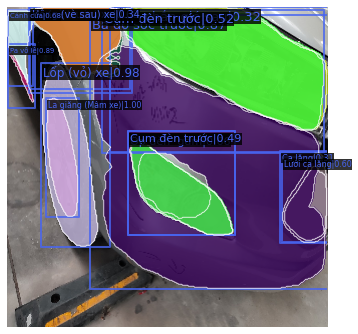

In [3]:
detector.plot(img)